### Ch6_1_1.py

In [1]:
import pandas as pd

# 載入資料集
df = pd.read_csv("./iris_data.csv")
# 顯示資料集的形狀
print(df.shape)

(150, 5)


### Ch6_1_1a.py

In [2]:
import pandas as pd

# 載入資料集
df = pd.read_csv("./iris_data.csv")
# 查看前5筆記錄
print(df.head())
df.head().to_html("Ch6_1_1a_01.html")
# 顯示資料集的描述資料
print(df.describe())
df.describe().to_html("Ch6_1_1a_02.html")

   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### Ch6_1_1b.py

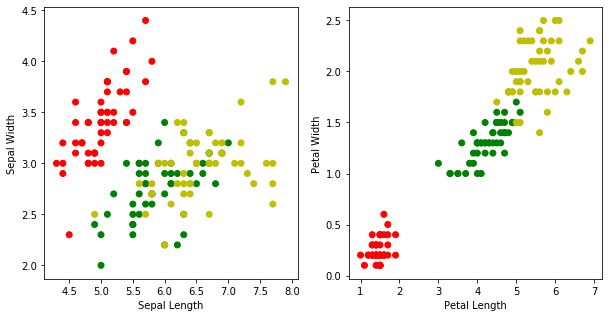

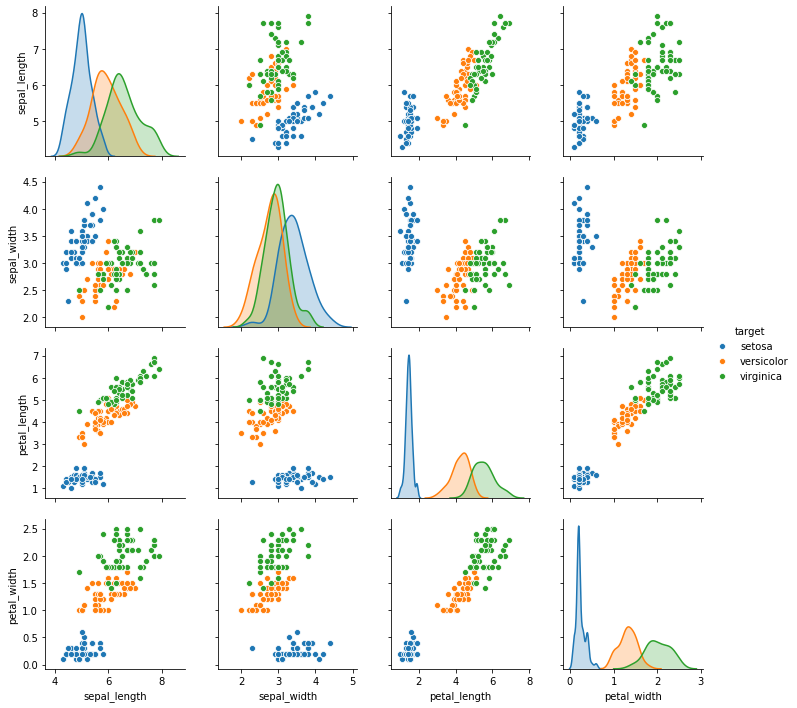

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 載入資料集
df = pd.read_csv("./iris_data.csv")
target_mapping = {"setosa": 0,
                  "versicolor": 1,
                  "virginica": 2}
Y = df["target"].map(target_mapping)
# 使用Matplotlib顯示視覺化圖表
colmap = np.array(["r", "g", "y"])
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.subplots_adjust(hspace = .5)
plt.scatter(df["sepal_length"], df["sepal_width"], color=colmap[Y])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.subplot(1, 2, 2)
plt.scatter(df["petal_length"], df["petal_width"], color=colmap[Y])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

# 使用Seaborn顯示視覺化圖表
sns.pairplot(df, hue="target")


### Ch6_1_2.py

In [10]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(7)  # 指定亂數種子
# 載入資料集
df = pd.read_csv("./iris_data.csv")
target_mapping = {"setosa": 0,
                  "versicolor": 1,
                  "virginica": 2}
df["target"] = df["target"].map(target_mapping)
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:,0:4].astype(float)
Y = to_categorical(dataset[:,4])
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 分割成訓練和測試資料集
X_train, Y_train = X[:120], Y[:120]     # 訓練資料前120筆
X_test, Y_test = X[120:], Y[120:]       # 測試資料後30筆
# 建立Keras的Sequential模型
model = Sequential()
model.add(Dense(6, input_shape=(4,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
print("Training ...")
model.fit(X_train, Y_train, epochs=100, batch_size=5, verbose=0)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test)
print("準確度 = {:.2f}".format(accuracy))
# 儲存Keras模型
print("Saving Model: iris.h5 ...")
model.save("iris.h5")

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 21        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________
Training ...

Testing ...
30/30 [==============================] - 0s 690us/step
準確度 = 0.90
Saving Model: iris.h5 ...


### Ch6_1_3.py 
* confusion matrix

In [12]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.utils import to_categorical
from keras.models import load_model

np.random.seed(7)  # 指定亂數種子
target_mapping = {"setosa": 0,
                  "versicolor": 1,
                  "virginica": 2}
# 載入資料集
df = pd.read_csv("./iris_data.csv")
df["target"] = df["target"].map(target_mapping)
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:,0:4].astype(float)
Y = to_categorical(dataset[:,4])
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 分割成訓練和測試資料集
X_train, Y_train = X[:120], Y[:120]     # 訓練資料前120筆
X_test, Y_test = X[120:], Y[120:]       # 測試資料後30筆
# 建立Keras的Sequential模型
model = Sequential()
model = load_model("iris.h5")
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 計算分類的預測值
print("\nPredicting ...")
Y_pred = model.predict_classes(X_test)
print(Y_pred)
Y_target = dataset[:,4][120:].astype(int)
print(Y_target)
# 顯示混淆矩陣
tb = pd.crosstab(Y_target, Y_pred, rownames=["label"], colnames=["predict"])
print(tb)
tb.to_html("Ch6_1_3.html")


Testing ...
30/30 [==============================] - 0s 668us/step
測試資料集的準確度 = 0.90

Predicting ...
[0 1 1 2 2 1 1 0 1 1 0 0 0 1 1 0 2 2 2 2 0 2 1 2 0 2 1 2 1 0]
[0 1 1 2 2 1 2 0 1 1 0 0 0 1 1 0 2 2 1 2 0 2 1 1 0 2 1 2 1 0]
predict  0   1  2
label            
0        9   0  0
1        0  10  2
2        0   1  8
